In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                      transform=transforms.Compose([
                          transforms.ToTensor()
                      ]))
test = datasets.MNIST('', train=False, download=True,
                      transform=transforms.Compose([
                          transforms.ToTensor()
                      ]))
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)
print("everything's loaded")

everything's loaded


In [3]:
# a few new imports
import torch.nn as nn
import torch.nn.functional as F
# the above are similar, nn is just instantiable

class Net(nn.Module):

    def __init__(self):
        super().__init__()
        # defining the fully connect to the layers to the network
        self.fc1 = nn.Linear(28*28, 64) # input is the images, output is 3 layers of 64 neurons of layers, nn.Linear is a flattened vector
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # takes in 64, but outputs 1-10

    def forward(self, x):  # defines how the data flow through our network
        x = F.relu(self.fc1(x)) # rectified linear over an entire layer; the activation function; whether or not the brain is firing
        x = F.relu(self.fc2(x)) # you can actually put logic, i.e. if statements
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  # this is a probability distribution for numbers 0-9
        return F.log_softmax(x, dim=1) # applies to output layer, "what is the probability distribution that we want to sum to 1"

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
X = torch.rand((28,28))
X = X.view(-1, 28*28) # -1 just specifies it is an unknown shape

In [10]:
output = net(X)

In [12]:
output

tensor([[-2.2087, -2.3450, -2.2651, -2.3284, -2.2499, -2.3687, -2.2680, -2.2910,
         -2.4151, -2.3028]], grad_fn=<LogSoftmaxBackward>)

In [15]:
# loss: how long is the model? we want it to be 100% confident
# optimizer: adjusts the weights in order to minimize the loss
import torch.optim as optim

# optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)  # learning rate: the size of the step, optimally you have a decaying learning rate
EPOCHS = 3 # a full passthrough of our data

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        # everytime we calculate loss and optimize the model
        net.zero_grad()  # when you can only pass one set of features/labels at a time, but you get the benefit of batch training
        output = net(X.view(-1, 28*28))
        # we can calculate how wrong were we
        loss = F.nll_loss(output, y)
        # two ways to calculate loss, "one hot vector" i.e. [0, 1, 0, 0, 0, 0, 0,0], 
        # if your data is a scalar value, use nll_loss, if your data is a 1 hot vector, use MSE
        # back propogation:
        loss.backward()
        optimizer.step()
    print(loss)
print("okay")

tensor(0.1116, grad_fn=<NllLossBackward>)
tensor(0.0131, grad_fn=<NllLossBackward>)
tensor(0.0160, grad_fn=<NllLossBackward>)
okay


In [18]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))
# My computer is super slow, still cannot see loss

Accuracy:  0.991


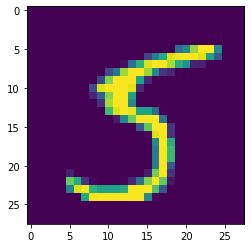

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X[7].view(28,28))
plt.show()

In [26]:
# for predicting
print(torch.argmax(net(X[7].view(-1, 784))[0]))

tensor(5)
